In [1]:
import datetime
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
#data=pd.read_csv(r"/content/data (1).csv")
#print(data)

In [ ]:
# '''new_column_name = 'Year'
# data.rename(columns={'Unnamed: 0': new_column_name}, inplace=True)
# data.to_excel('/content/gdrive/MyDrive/Time_Series_Prediction /modified.xlsx', index=False)'''

In [ ]:
'''data1=pd.read_excel(r'/content/gdrive/MyDrive/Time_Series_Prediction /modified.xlsx')
print(data1)'''

"data1=pd.read_excel(r'/content/gdrive/MyDrive/Time_Series_Prediction /modified.xlsx')\nprint(data1)"

In [ ]:
#print(data1)

In [ ]:
#data1.head()

In [ ]:
#data1.columns

In [ ]:
#data1.describe()

In [ ]:
#print(data1)

In [ ]:
'''data1['Est number of deaths'] = data1['Est number of deaths'].str.replace(r'(\d) (\d)', r'\1\2')
data1['Est number of deaths'] = data1['Est number of deaths'].str.replace(r'\[.*\]', '')
data1['Est number of cases'] = data1['Est number of cases'].str.replace(r'(\d) (\d)', r'\1\2')
data1['Est number of cases'] = data1['Est number of cases'].str.replace(r'\[.*\]', '')
data1.to_excel('/content/gdrive/MyDrive/Time_Series_Prediction /modified(1).xlsx', index=False)'''

"data1['Est number of deaths'] = data1['Est number of deaths'].str.replace(r'(\\d) (\\d)', r'\x01\x02')\ndata1['Est number of deaths'] = data1['Est number of deaths'].str.replace(r'\\[.*\\]', '')\ndata1['Est number of cases'] = data1['Est number of cases'].str.replace(r'(\\d) (\\d)', r'\x01\x02')\ndata1['Est number of cases'] = data1['Est number of cases'].str.replace(r'\\[.*\\]', '')\ndata1.to_excel('/content/gdrive/MyDrive/Time_Series_Prediction /modified(1).xlsx', index=False)"

In [73]:
data2=pd.read_excel(r'/content/modified(1) (2).xlsx')

In [61]:
'''corr_matrix = data2.corr()
import seaborn as sb
plt.figure(figsize=(8, 6))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()'''

"corr_matrix = data2.corr()\nimport seaborn as sb\nplt.figure(figsize=(8, 6))\nsb.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)\nplt.title('Correlation Heatmap')\nplt.show()"

In [62]:
print(data)

NameError: name 'data' is not defined

In [71]:
data['Year'] = pd.to_datetime(data2['Year'], format='%Y%')

In [72]:
type(data["Year"])

NameError: name 'data' is not defined

In [70]:
data["Year"] = data["Year"].astype(int)

NameError: name 'data' is not defined

In [65]:
type(data["Year"])

NameError: name 'data' is not defined

In [ ]:
data.set_index('Year', inplace=True)

In [ ]:
print(data)

In [66]:
import matplotlib.pyplot as plt

In [67]:
print(type(data["Number of Cases"]))

NameError: name 'data' is not defined

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(list(data))
df = data

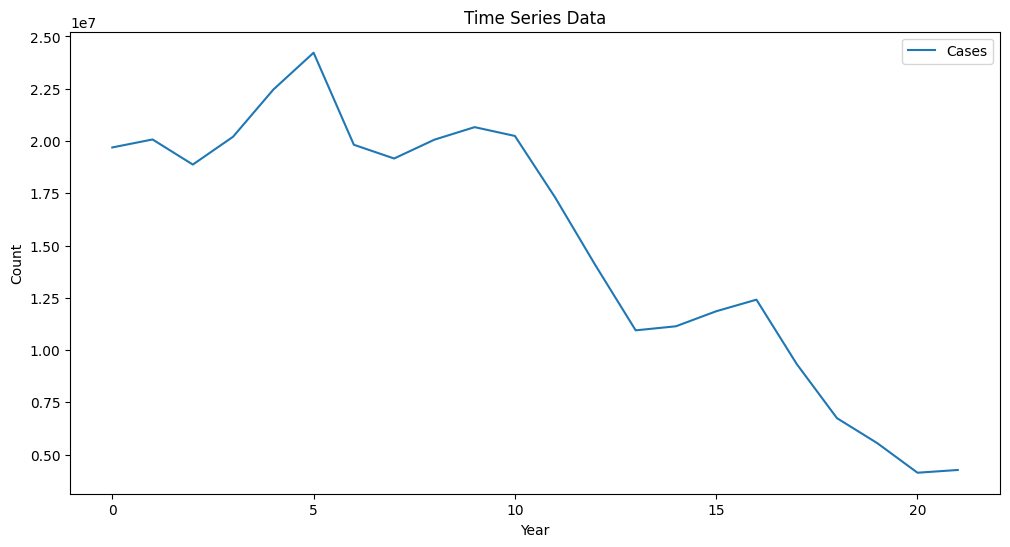

In [75]:
plt.figure(figsize=(12, 6))
plt.plot(data2['Est number of cases'], label='Cases')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Time Series Data')
plt.legend()
plt.show()

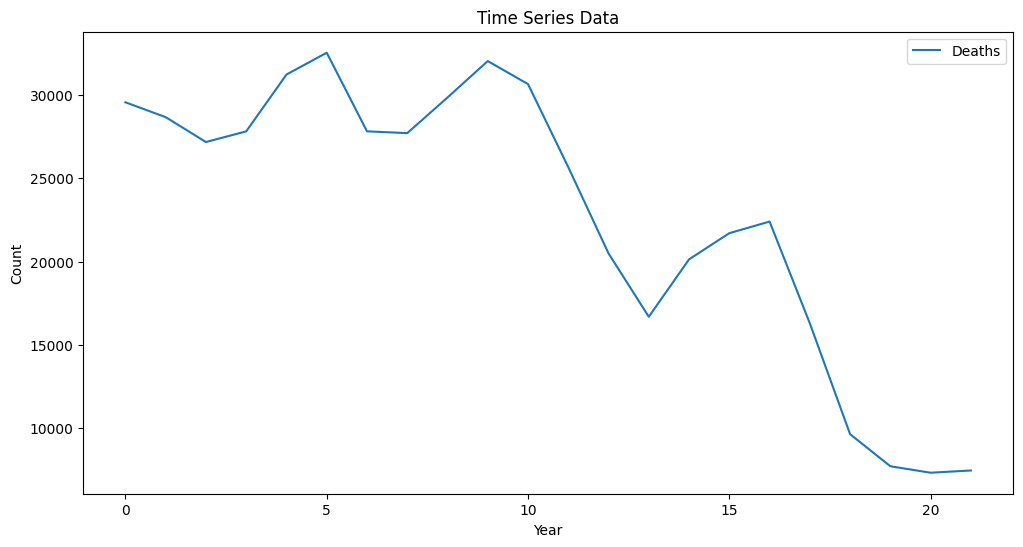

In [76]:
plt.figure(figsize=(12, 6))
plt.plot(data2['Est number of deaths'], label='Deaths')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Time Series Data')
plt.legend()
plt.show()

# Check Stationarity

In [77]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    plt.figure(figsize=(12,6))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

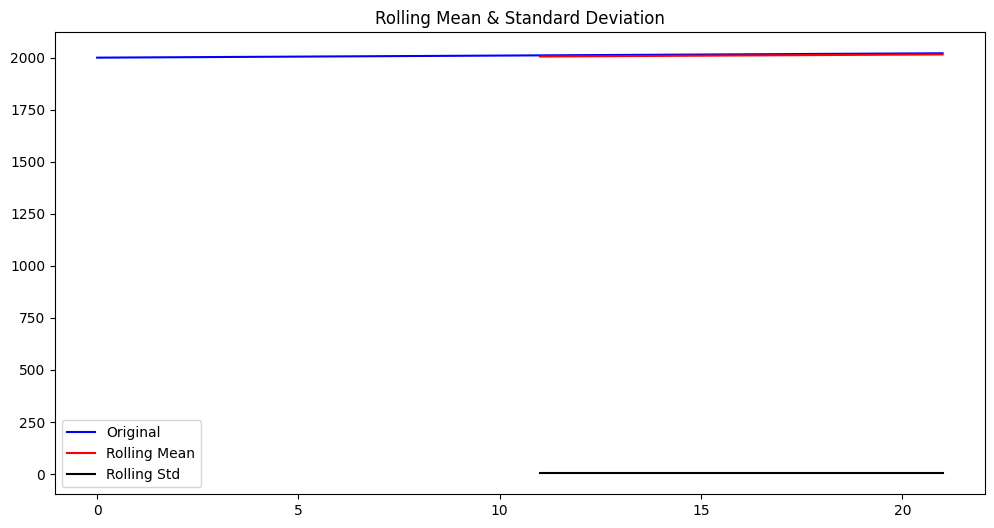

Results of Dickey-Fuller Test:
Test Statistic                  0.012042
p-value                         0.959517
#Lags Used                      4.000000
Number of Observations Used    17.000000
Critical Value (1%)            -3.889266
Critical Value (5%)            -3.054358
Critical Value (10%)           -2.666984
dtype: float64


In [78]:
test_stationarity(data2.iloc[:,0])

 # Exponential Smoothing


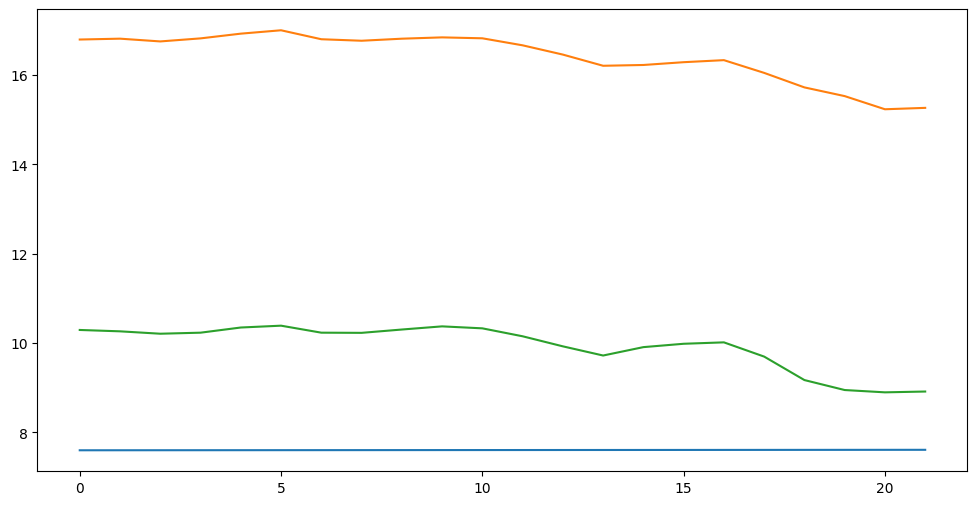

In [79]:
  ts_log=np.log(data2)
  plt.figure(figsize=(12,6))
  plt.plot(ts_log)

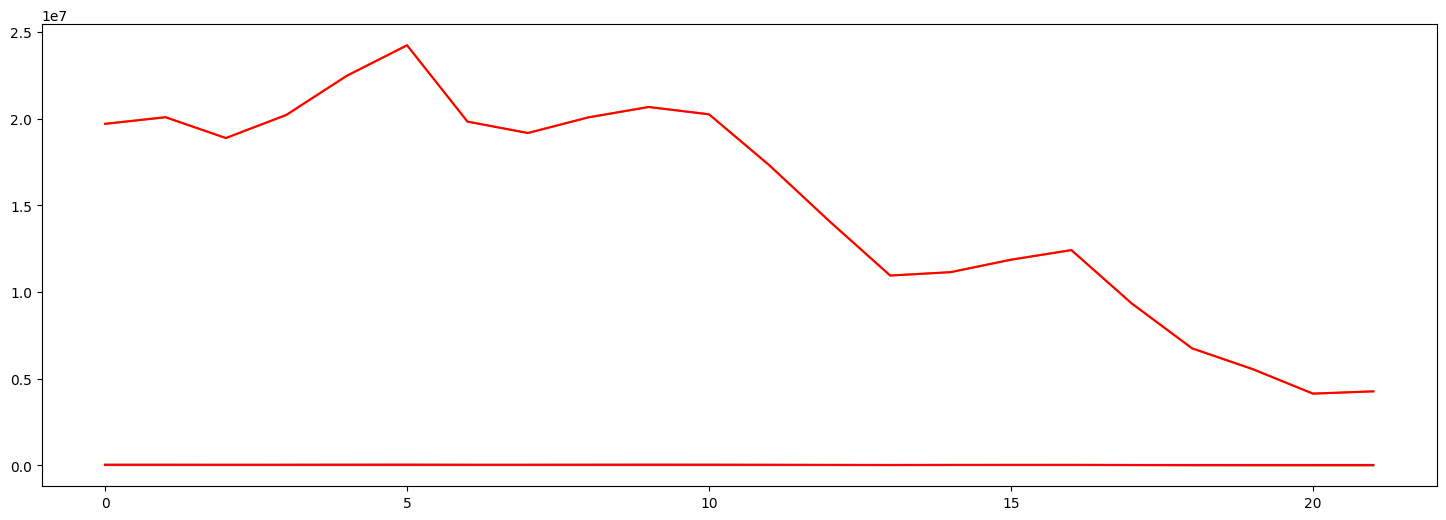

In [80]:
moving_avg=data2.rolling(1).mean()
plt.figure(figsize=(18,6))
plt.plot(data2)
plt.plot(moving_avg,color="red")

Subtract the Data With Moving Average

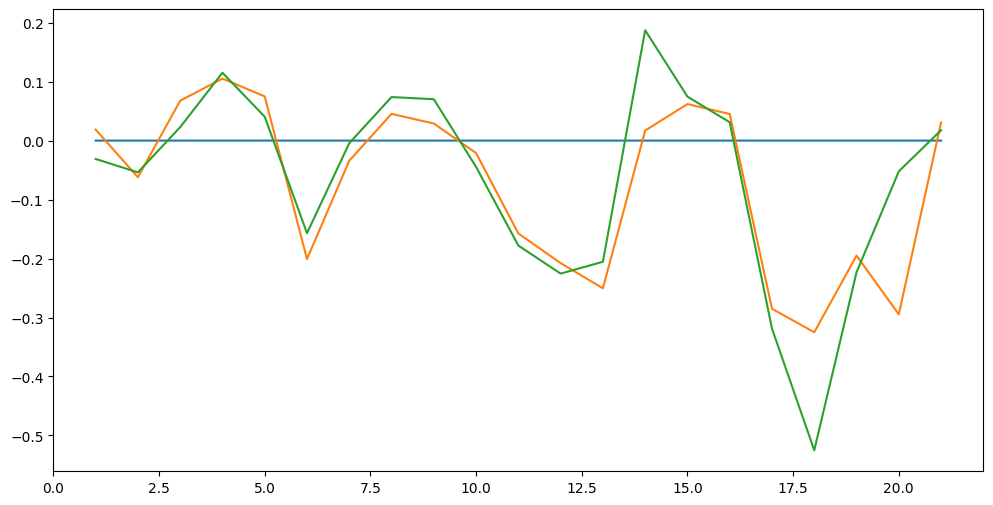

In [81]:
ts_log_diff= ts_log - ts_log.shift()
plt.figure(figsize=(12,6))
plt.plot(ts_log_diff)

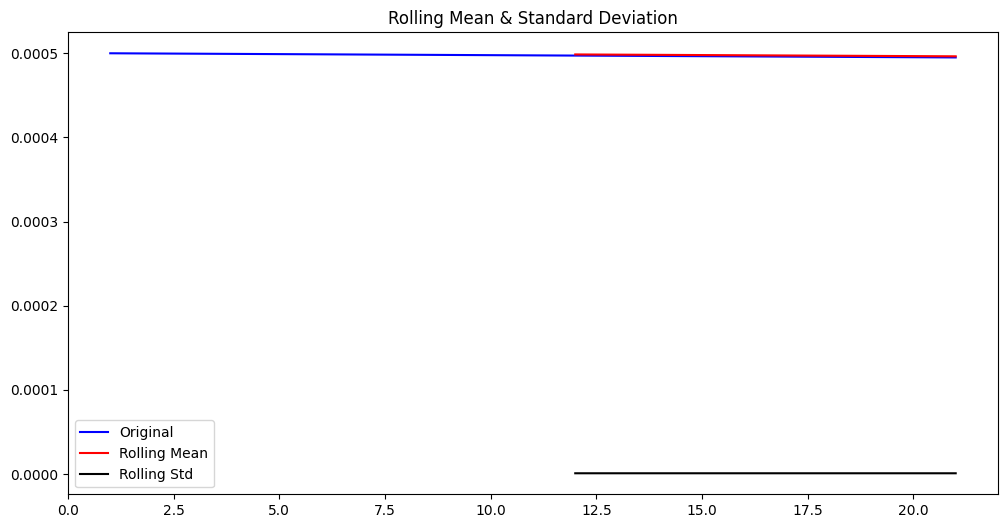

Results of Dickey-Fuller Test:
Test Statistic                -1.805498e+01
p-value                        2.632381e-30
#Lags Used                     7.000000e+00
Number of Observations Used    1.300000e+01
Critical Value (1%)           -4.068854e+00
Critical Value (5%)           -3.127149e+00
Critical Value (10%)          -2.701730e+00
dtype: float64


In [82]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff.iloc[:,0])

# Seasonal Decomposition

<Figure size 1600x800 with 0 Axes>

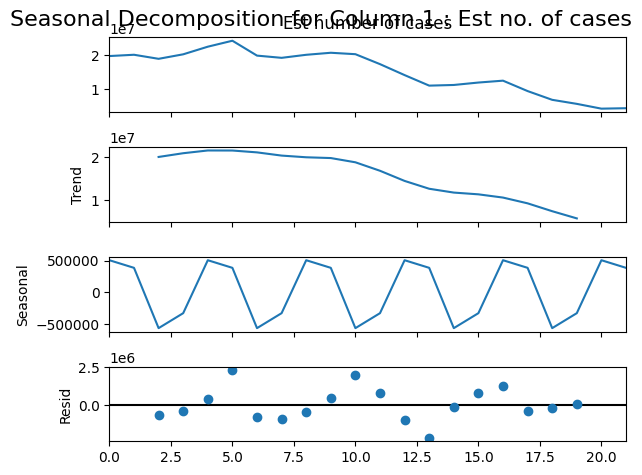

<Figure size 1600x800 with 0 Axes>

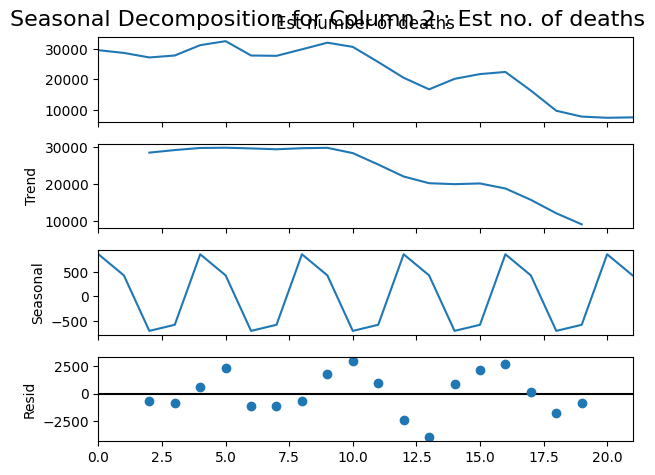

In [83]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition1 = seasonal_decompose(data2["Est number of cases"],model="additive",period=4)
decomposition2 = seasonal_decompose(data2["Est number of deaths"],model="additive",period=4)
plt.figure(figsize=(16,8))
decomposition1.plot()
plt.suptitle("Seasonal Decomposition for Column 1 : Est no. of cases",fontsize=16)
plt.figure(figsize=(16,8))
decomposition2.plot()
plt.suptitle("Seasonal Decomposition for Column 2 : Est no. of deaths",fontsize=16)
plt.show()

# ACF and PACF

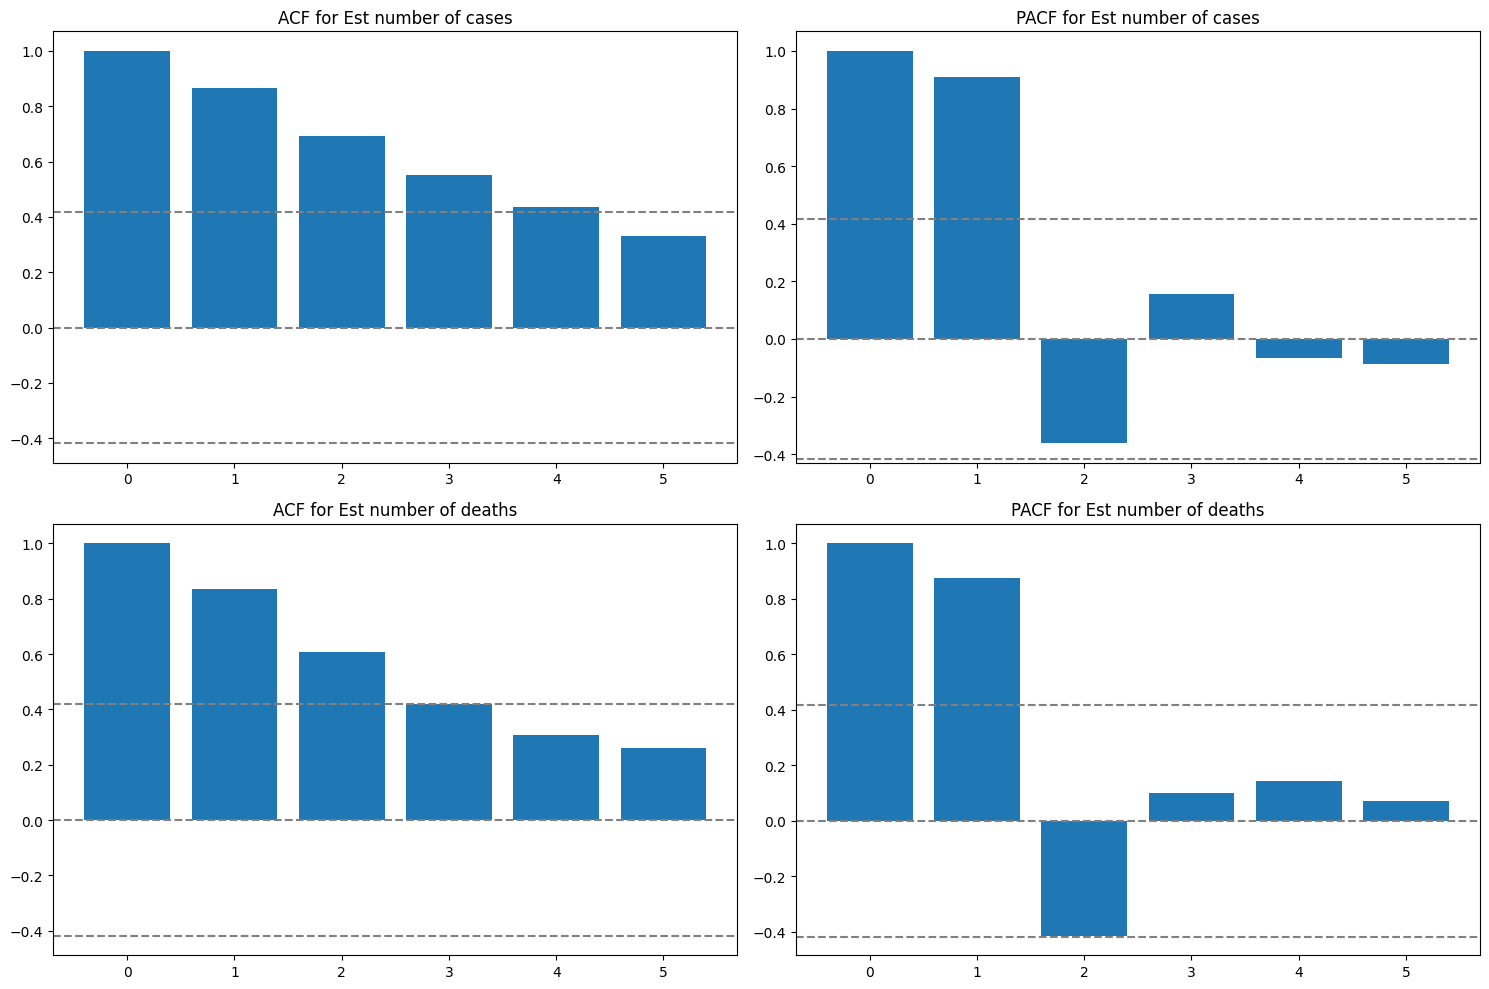

In [84]:
import numpy as np
from statsmodels.tsa.stattools import acf,pacf
nlags=5
#perform PACF and ACF on 1 columns
lag_acf1=acf(data2["Est number of cases"], nlags=nlags)
lag_pacf1=pacf(data2["Est number of cases"], nlags=nlags)
#perform PACF and ACF on 2 columns
lag_acf2=acf(data2["Est number of deaths"], nlags=nlags)
lag_pacf2=pacf(data2["Est number of deaths"], nlags=nlags)

plt.figure(figsize=(15,10))

# plot acf for column 1
plt.subplot(221)
plt.bar(np.arange(nlags+1),lag_acf1)
plt.axhline(y=0,linestyle="--",color="gray")
plt.axhline(y=-1.96/np.sqrt(len(data2["Est number of cases"])),linestyle="--",color="gray")
plt.axhline(y=1.96 / np.sqrt(len(data2['Est number of cases'])), linestyle='--', color='gray')
plt.title("ACF for Est number of cases")

 # plot pacf for column 1
plt.subplot(222)
plt.bar(np.arange(nlags+1),lag_pacf1)
plt.axhline(y=0,linestyle="--",color="gray")
plt.axhline(y=-1.96/np.sqrt(len(data2["Est number of cases"])),linestyle="--",color="gray")
plt.axhline(y=1.96 / np.sqrt(len(data2['Est number of cases'])), linestyle='--', color='gray')
plt.title("PACF for Est number of cases")

# plot acf for column 2
plt.subplot(223)
plt.bar(np.arange(nlags+1),lag_acf2)
plt.axhline(y=0,linestyle="--",color="gray")
plt.axhline(y=-1.96/np.sqrt(len(data2["Est number of deaths"])),linestyle="--",color="gray")
plt.axhline(y=1.96 / np.sqrt(len(data2['Est number of deaths'])), linestyle='--', color='gray')
plt.title("ACF for Est number of deaths")

 # plot pacf for column 1
plt.subplot(224)
plt.bar(np.arange(nlags+1),lag_pacf2)
plt.axhline(y=0,linestyle="--",color="gray")
plt.axhline(y=-1.96/np.sqrt(len(data2["Est number of deaths"])),linestyle="--",color="gray")
plt.axhline(y=1.96 / np.sqrt(len(data2['Est number of deaths'])), linestyle='--', color='gray')
plt.title("PACF for Est number of deaths")

plt.tight_layout()
plt.show()

# Arima

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<function matplotlib.pyplot.show(close=None, block=None)>

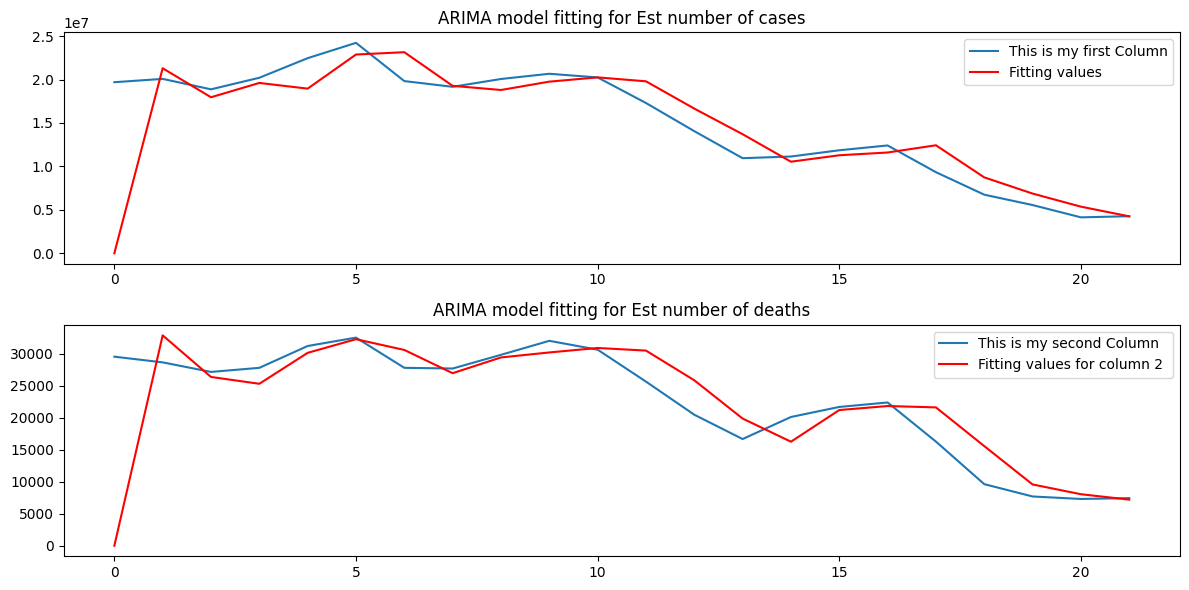

In [85]:
from statsmodels.tsa.arima.model import ARIMA
model1=ARIMA(data2["Est number of cases"],order=(2,1,2))
results_ARIMA1=model1.fit()
model2=ARIMA(data2["Est number of deaths"],order=(2,1,2))
results_ARIMA2=model2.fit()
 # plot thing
plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
plt.plot(data2["Est number of cases"],label="This is my first Column")
plt.plot(results_ARIMA1.fittedvalues,color="red",label="Fitting values")
plt.legend()
plt.title("ARIMA model fitting for Est number of cases")

#plotting for 2 column
plt.subplot(2,1,2)
plt.plot(data2["Est number of deaths"],label="This is my second Column")
plt.plot(results_ARIMA2.fittedvalues,color="red",label="Fitting values for column 2 ")
plt.legend()
plt.title("ARIMA model fitting for Est number of deaths")

plt.tight_layout()
plt.show

In [86]:
results_ARIMA1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:     Est number of cases   No. Observations:                   22
Model:                  ARIMA(2, 1, 2)   Log Likelihood                -333.808
Date:                 Fri, 19 Jan 2024   AIC                            677.615
Time:                         17:47:22   BIC                            682.838
Sample:                              0   HQIC                           678.749
                                  - 22                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2640      0.201      1.314      0.189      -0.130       0.658
ar.L2          0.6527      0.225      2.902      0.004       0.212       1.093
ma.L1         -0.1804      0.247     -0.731      0.465      -0.664       0.304
ma.L2         -0.8196      0.302     -2.718      0.007      -1.411      -0.229
sigma2      2.007e+12   1.97e-13   1.02e+25      0.000    2.01e+12    2.01e+12
===================================================================================
Ljung-Box (L1) (Q):                   2.27   Jarque-Bera (JB):                 0.38
Prob(Q):                              0.13   Prob(JB):                         0.83
Heteroskedasticity (H):               0.65   Skew:                             0.05
Prob(H) (two-sided):                  0.58   Kurtosis:                         2.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.06e+40. Standard errors may be unstable.
"""

In [87]:
results_ARIMA2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:     Est number of deaths   No. Observations:                   22
Model:                   ARIMA(2, 1, 2)   Log Likelihood                -197.669
Date:                  Fri, 19 Jan 2024   AIC                            405.337
Time:                          17:47:22   BIC                            410.560
Sample:                               0   HQIC                           406.470
                                   - 22                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1746      0.366     -0.477      0.633      -0.892       0.543
ar.L2         -0.7480      0.197     -3.798      0.000      -1.134      -0.362
ma.L1          0.3107      0.353      0.881      0.378      -0.380       1.002
ma.L2          0.7363      0.290      2.539      0.011       0.168       1.305
sigma2      8.537e+06   9.98e-09   8.55e+14      0.000    8.54e+06    8.54e+06
===================================================================================
Ljung-Box (L1) (Q):                   2.85   Jarque-Bera (JB):                 1.30
Prob(Q):                              0.09   Prob(JB):                         0.52
Heteroskedasticity (H):               2.05   Skew:                            -0.36
Prob(H) (two-sided):                  0.37   Kurtosis:                         2.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.66e+31. Standard errors may be unstable.
"""

In [88]:
# For making predictions
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
predictions_cases = results_ARIMA1.predict(start=1,end=len(data2),typ="levels")
predictions_deaths = results_ARIMA2.predict(start=1,end=len(data2),typ="levels")
# for Cases Column
print("Prediction for Estimated Number of cases : ")
print(predictions_cases)
# for Death Column
print("Prediction for Estimated Number of Deaths : ")
print(predictions_deaths)

Prediction for Estimated Number of cases : 
1     2.129920e+07
2     1.795971e+07
3     1.960829e+07
4     1.895194e+07
5     2.287928e+07
6     2.314643e+07
7     1.927370e+07
8     1.879639e+07
9     1.975659e+07
10    2.024714e+07
11    1.979550e+07
12    1.665330e+07
13    1.370531e+07
14    1.054091e+07
15    1.128167e+07
16    1.159946e+07
17    1.243157e+07
18    8.733999e+06
19    6.871153e+06
20    5.364301e+06
21    4.247452e+06
22    4.364392e+06
Name: predicted_mean, dtype: float64
Prediction for Estimated Number of Deaths : 
1     32893.402844
2     26389.080336
3     25321.127947
4     30160.738146
5     32290.883791
6     30612.445034
7     26978.559640
8     29439.583494
9     30220.990149
10    30919.140707
11    30511.023067
12    25870.058973
13    19884.919094
14    16265.030917
15    21216.855116
16    21843.692901
17    21630.951608
18    15578.902264
19     9582.113056
20     8055.724879
21     7212.017530
22     7246.201761
Name: predicted_mean, dtype: float64


In [89]:
#  Forecasting for next 4 years
n_future_years = 4
prediction_cases= results_ARIMA1.predict(start=len(data2),end=len(data2)+n_future_years - 1,typ="levels")
prediction_deaths= results_ARIMA2.predict(start=len(data2),end=len(data2)+n_future_years - 1,typ="levels")
print("Forecasting for Estimated number of cases will be :  ")
print(prediction_cases)
print("Forecasting for Estimated number of deaths will be :  ")
print(prediction_deaths)


Forecasting for Estimated number of cases will be :  
22    4.364392e+06
23    4.461979e+06
24    4.552590e+06
25    4.640200e+06
Name: predicted_mean, dtype: float64
Forecasting for Estimated number of deaths will be :  
22    7246.201761
23    7356.758337
24    7489.902215
25    7383.950443
Name: predicted_mean, dtype: float64


In [90]:
#Predictions for future
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Assuming you have already fitted ARIMA models as per your previous code
# Also, assuming your data is indexed by 'Year'

# Get the most recent year in your data
most_recent_year = data2.index.max()

# Define the number of future years you want to predict
n_future_years = 4  # You can adjust this for the desired number of years

# Calculate the starting and ending years for predictions
start_year = most_recent_year + 1
end_year = most_recent_year + n_future_years

# Make predictions for both columns for the future years
predictions_cases = results_ARIMA1.predict(start=start_year, end=end_year, typ='levels')
predictions_deaths = results_ARIMA2.predict(start=start_year, end=end_year, typ='levels')

# Print the forecasting values
print("Forecasted values for Est number of cases:")
print(predictions_cases)

print("Forecasted values for Est number of deaths:")
print(predictions_deaths)


Forecasted values for Est number of cases:
22    4.364392e+06
23    4.461979e+06
24    4.552590e+06
25    4.640200e+06
Name: predicted_mean, dtype: float64
Forecasted values for Est number of deaths:
22    7246.201761
23    7356.758337
24    7489.902215
25    7383.950443
Name: predicted_mean, dtype: float64


In [91]:
# Evaluation of our model
from sklearn.metrics import mean_squared_error,mean_absolute_error
true_cases=data2["Est number of cases"]
true_deaths=data2["Est number of deaths"]
# RMSE
rmse_cases=np.sqrt(mean_squared_error(true_cases,predictions_cases))
print("RMSE for Est number of cases :", rmse_cases)
rmse_deaths=np.sqrt(mean_squared_error(true_deaths,predictions_deaths))
print("RMSE for Est number of deaths :", rmse_deaths)

ValueError: Found input variables with inconsistent numbers of samples: [22, 4]

# Sarimax Model

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<function matplotlib.pyplot.show(close=None, block=None)>

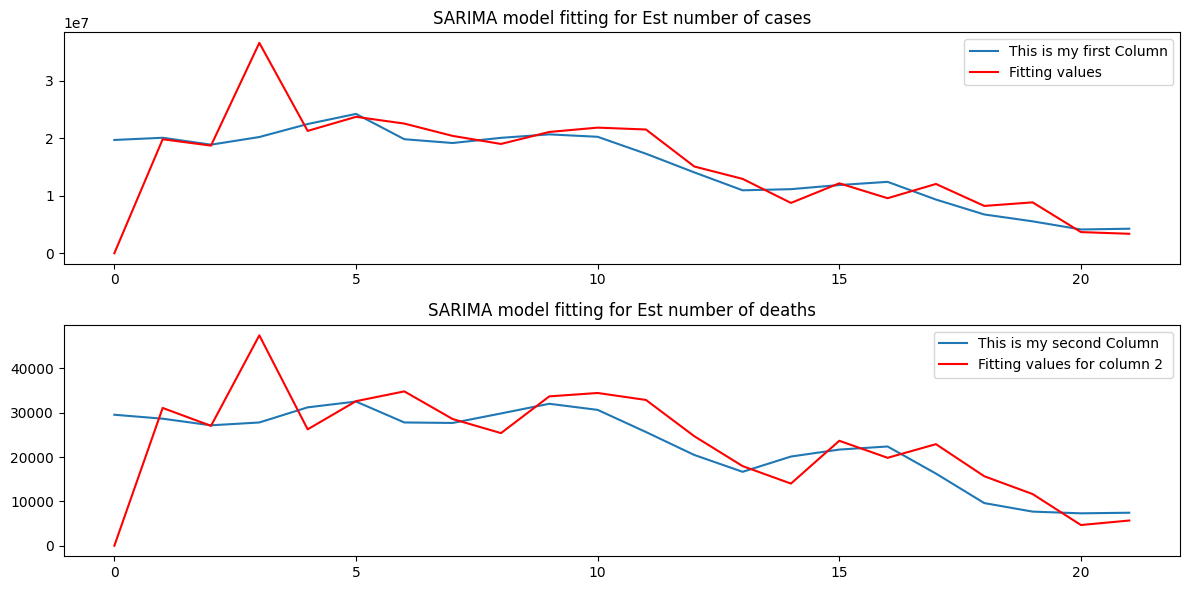

In [93]:
import statsmodels.api as sm
model1=sm.tsa.SARIMAX(data2["Est number of cases"],order=(2,1,2),seasonal_order=(2,1,2,3))
results_SARIMAX1=model1.fit()
model2=sm.tsa.SARIMAX(data2["Est number of deaths"],order=(2,1,2),seasonal_order=(2,1,2,3))
results_SARIMAX2=model2.fit()
 # plot thing
plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
plt.plot(data2["Est number of cases"],label="This is my first Column")
plt.plot(results_SARIMAX1.fittedvalues,color="red",label="Fitting values")
plt.legend()
plt.title("SARIMA model fitting for Est number of cases")

#plotting for 2 column
plt.subplot(2,1,2)
plt.plot(data2["Est number of deaths"],label="This is my second Column")
plt.plot(results_SARIMAX2.fittedvalues,color="red",label="Fitting values for column 2 ")
plt.legend()
plt.title("SARIMA model fitting for Est number of deaths")

plt.tight_layout()
plt.show

In [94]:
predictions_cases = results_SARIMAX1.predict(start=1, end=len(data2), typ="levels")
predictions_deaths = results_SARIMAX2.predict(start=1, end=len(data2), typ="levels")


print("Prediction for Estimated Number of cases : ")
print(predictions_cases)

print("Prediction for Estimated Number of Deaths : ")
print(predictions_deaths)

Prediction for Estimated Number of cases : 
1     1.981340e+07
2     1.871114e+07
3     3.657112e+07
4     2.126933e+07
5     2.371098e+07
6     2.253995e+07
7     2.039828e+07
8     1.899824e+07
9     2.108437e+07
10    2.183580e+07
11    2.151199e+07
12    1.507942e+07
13    1.292694e+07
14    8.748495e+06
15    1.215704e+07
16    9.566995e+06
17    1.204564e+07
18    8.227671e+06
19    8.845639e+06
20    3.680591e+06
21    3.384567e+06
22    7.242583e+05
Name: predicted_mean, dtype: float64
Prediction for Estimated Number of Deaths : 
1     31096.684523
2     27052.834716
3     47473.193897
4     26266.273496
5     32620.186794
6     34832.168832
7     28592.890106
8     25414.259005
9     33705.615299
10    34472.247201
11    32896.550723
12    24715.677985
13    17969.170737
14    14029.276106
15    23684.978903
16    19844.065833
17    22923.874199
18    15682.807029
19    11668.959223
20     4680.876642
21     5693.508893
22     2944.439437
Name: predicted_mean, dtype: float64


In [95]:
most_recent_year = data2.index.max()
print(most_recent_year)
# Define the number of future years you want to predict
n_future_years = 4  # You can adjust this for the desired number of years

# Calculate the starting and ending years for predictions
start_year = most_recent_year + 1
end_year = most_recent_year + n_future_years
# Make predictions for both columns for the future years
predictions_cases = results_SARIMAX1.predict(start=start_year, end=end_year, typ='levels')
predictions_deaths = results_SARIMAX2.predict(start=start_year, end=end_year, typ='levels')

# Print the forecasting values
print("Forecasted values for Est number of cases:")
print(predictions_cases)

print("Forecasted values for Est number of deaths:")
print(predictions_deaths)

21
Forecasted values for Est number of cases:
22    724258.314029
23   -728738.249122
24    358158.746690
25    588927.926623
Name: predicted_mean, dtype: float64
Forecasted values for Est number of deaths:
22    2944.439437
23    2827.161542
24    5926.171420
25    6987.760610
Name: predicted_mean, dtype: float64
